In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import tensorflow as tf

In [ ]:
# 7x7 은 3x3이 나온다

# stride 캐릭터가 이동하는 간격

# padding 안에 끼워넣기 :이미 안에 끼워주기, 0으로끼워주는것, 이미지가 너무 작아지지않게하는것



# 1.기본예제

#### (1) 샘플1

+ 3 * 3 * 1 * 1 이미지 준비 마지막(1)은 한장의 이미지를 가져다 쓰겠다  
+ 2 * 2 * 1 필터 준비

(1, 3, 3, 1)


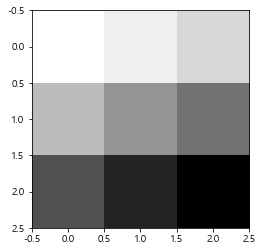

In [2]:
image = np.array([[[[1], [2], [3]],
                  [[4], [5], [6]],
                  [[7], [8], [9]]]], dtype=np.float32)  # 배열로 이미지만들기 4차원

print(image.shape)

plt.imshow(image.reshape(3,3), cmap="Greys")


#첫번째 1 갯수 
#네번재 1 색상수

(2, 2, 1, 1)
(1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


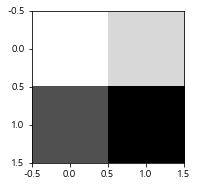

In [4]:
filter = tf.constant([[[[1.]], [[1]]],
                     [[[1.]], [[1.]]]])

print(filter.shape)

# 1*1 2*1 4*1 5*1 =12

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding="VALID") # 양쪽(1,4)에 1은 크기를 맞춰주는 용도
                                                 # 중간(2,3)번째는 이동간격 
    
    
    
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img,0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(2,2),cmap="Greys")


    
# 22 가로세로 크기 ,색상수 ,갯수

(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


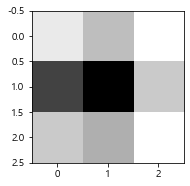

In [6]:
filter = tf.constant([[[[1.]], [[1]]],
                     [[[1.]], [[1.]]]])

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding="SAME") # 양쪽(1,4)에 1은 크기를 맞춰주는 용도
                                                 # 중간(2,3)번째는 이동간격 
# SAME는 패딩을 하겠다.
    
    
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape)


conv2d_img = np.swapaxes(conv2d_img,0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(3,3),cmap="Greys")


+ 3 개의 필터 사용 2 *2* 1*3

(2, 2, 1, 3)
(1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


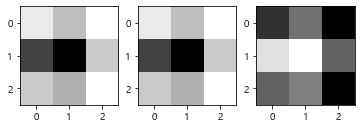

In [9]:
filter = tf.constant([[[[1.,10,-1]], [[1.,10,-1]]],
                     [[[1., 10, -1]], [[1.,10,-1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(image, filter, strides=[1,1,1,1],padding="SAME") # 양쪽(1,4)에 1은 크기를 맞춰주는 용도
                                                 # 중간(2,3)번째는 이동간격 
# SAME는 패딩을 하겠다.
    
    
sess = tf.Session()
conv2d_img = sess.run(conv2d)
print(conv2d_img.shape) # 색상수 1, 3x3 크기 ,갯수3

conv2d_img = np.swapaxes(conv2d_img,0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1)
    plt.imshow(one_img.reshape(3,3),cmap="Greys")

+ MaxPooling : 2 * 2 필터
+ padding 없음

In [14]:
image2 =tf.constant([[[[4],[3]],
                     [[2],[1]]]])
print(image2.shape)

pool =tf.nn.max_pool(image2, ksize=[1,2,2,1],strides=[1,1,1,1],padding="VALID")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

(1, 2, 2, 1)
(1, 1, 1, 1)
[[[[4]]]]


In [15]:
image2 =tf.constant([[[[4],[3]],
                     [[2],[1]]]])
print(image2.shape)

pool =tf.nn.max_pool(image2, ksize=[1,2,2,1],strides=[1,1,1,1],padding="SAME")

sess = tf.Session()
p = sess.run(pool)
print(p.shape)
print(p)

# 최대값

(1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4]
   [3]]

  [[2]
   [1]]]]


### 2. 응용 예제 1: MNIST 를 이용한 Simple CNN 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data1/mnist/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data1/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data1/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data1/mnist/t10k-images-idx3-ubyte.gz
Extracting data1/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(784,)


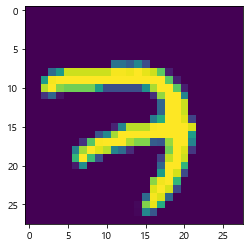

In [18]:
### 데이터 확인

img = mnist.train.images[0]
print(img.shape)

plt.imshow(img.reshape(28,28))

In [19]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32,shape=[None,784])
y = tf.placeholder(tf.float32,shape=[None,10])

# Simple CNN 특징 추출단계

## (1) 첫번째 Convolution Layer

+ 필터
    - 크기: 3* 3 
    - 갯수: 32
    - 색상수 : 1

In [48]:
# 원본 이미지 준비


origin_X = tf.reshape(X,[-1,28,28,1])

# 필터(가중치) 준비

W1= tf.Variable(tf.random_normal([3,3,1,32]))

# Convolution Layer : stride 1칸 ,패딩 있음
layer1 =tf.nn.conv2d(origin_X,W1,strides=[1,1,1,1], padding="SAME")
print(layer1)

layer1 = tf.nn.relu(layer1)
print(layer1)

Tensor("Conv2D_8:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu_8:0", shape=(?, 28, 28, 32), dtype=float32)


## (2) 첫번째 pooling

+ 필터 크키: 2 * 2
    
+ stride : 2
    
+ paddin 사용


In [49]:
layer1 = tf.nn.max_pool(layer1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print(layer1)

Tensor("MaxPool_11:0", shape=(?, 14, 14, 32), dtype=float32)


### 3. 두 번째 Convolution Layer

+ 필터
    - 크기 : 3* 3
    - 갯수 : 64
    - 색상수 : 1

In [50]:
# 필터 준비
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

# convolution layer

layer2 =tf.nn.conv2d(layer1,W2,strides=[1,1,1,1],padding="SAME")
print(layer2)

layer2 = tf.nn.relu(layer2)
print(layer2)

Tensor("Conv2D_9:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_9:0", shape=(?, 14, 14, 64), dtype=float32)


# (4) 두번째 pooling

+ 필터 크기 : 2*2
+ stride : 2
+ padding 사용

In [51]:
layer2 = tf.nn.max_pool(layer2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
print(layer2)

Tensor("MaxPool_12:0", shape=(?, 7, 7, 64), dtype=float32)


### (5) FC(Fully Connected) Layer: Dense Layer

In [40]:
### Hyper Parameter 준비

lr = 0.001
training_epochs = 20
batch_size = 500

####### Tensorflow Grapn

train_X = tf.reshape(layer2,[-1,7*7*64])

W= tf.Variable(tf.random_normal([7*7*64,10]))
b= tf.Variable(tf.random_normal([10]))


# 비용

logit = tf.matmul(train_X,W)+b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,labels=y))

# 최저 비용

train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y})
        
        avg_cost += c / total_batch
        
    print(epoch+1, avg_cost)

1 0.9980119953101331
2 0.2257094240324064
3 0.17503473995761445
4 0.13382488854906774
5 0.1217837003144351
6 0.10411829809573561
7 0.09754950780082831
8 0.08761713504791263
9 0.07534534616226501
10 0.07099316106601196
11 0.065035050413148
12 0.058735820515589274
13 0.05294392259622164
14 0.04697312053970316
15 0.04988651723516259
16 0.04270406455986879
17 0.03893456998365845
18 0.03178631013936617
19 0.029958427684720255
20 0.029916667675768786


In [41]:
preds = tf.argmax(logit, 1)
correct = tf.equal(preds,tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))


sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels})

0.979

### (6) Deep & Wide FC

+ 레이어는 총 3개 사용, 입출력 갯수는 128개 사용
+ Xavier 초기화 사용
+ dropout 사용(70%)
+ traing_epcochs : 15
+ batch_size: 100

In [52]:
##### Hyper Parameter 준비
lr = 0.001
training_epochs = 15
batch_size = 100
prob = tf.placeholder(tf.float32)

##### Tensorflow Graph
train_X = tf.reshape(layer2, [-1, 7*7*64])


# Layer1
W1 = tf.get_variable("W1", shape=[7*7*64, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([128]))
logit1 = tf.matmul(train_X, W1) + b1
train_X = tf.nn.relu(logit1)
l1 = tf.nn.dropout(train_X, keep_prob=prob)

# Layer2
W2 = tf.get_variable("W2", shape=[128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([128]))
logit2 = tf.matmul(l1, W2) + b2
l2 = tf.nn.relu(logit2)
l2 = tf.nn.dropout(l2, keep_prob=prob)

# Layer3
W_out = tf.get_variable("W_out", shape=[128, 10], initializer=tf.contrib.layers.xavier_initializer())
b_out = tf.Variable(tf.random_normal([10]))
logit = tf.matmul(l2, W_out) + b_out

# 비용
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=y))

# 최저 비용
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)

##### Tensor Graph 실행
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    total_batch = int(mnist.train.num_examples / batch_size)
    avg_cost = 0
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([train, cost], 
                        feed_dict={X:batch_x, y:batch_y, prob:0.7})
        
        avg_cost += c / total_batch
        
    print(epoch+1, avg_cost)

ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()
  File "C:\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "C:\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "C:\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)


In [53]:
preds = tf.argmax(logit, 1)
correct = tf.equal(preds,tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))


sess.run(accuracy, feed_dict={X:mnist.test.images, y:mnist.test.labels,prob:1.0})

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[node Placeholder_2 (defined at anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) ]]

Original stack trace for 'Placeholder_2':
  File "anaconda3\envs\tf1\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "anaconda3\envs\tf1\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "anaconda3\envs\tf1\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop.start()
  File "anaconda3\envs\tf1\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "anaconda3\envs\tf1\lib\asyncio\base_events.py", line 541, in run_forever
    self._run_once()
  File "anaconda3\envs\tf1\lib\asyncio\base_events.py", line 1786, in _run_once
    handle._run()
  File "anaconda3\envs\tf1\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
    await result
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "anaconda3\envs\tf1\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 2902, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
    return runner(coro)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3173, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "anaconda3\envs\tf1\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "Users\김정호\AppData\Local\Temp/ipykernel_23200/3092929239.py", line 5, in <module>
    prob = tf.placeholder(tf.float32)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\ops\array_ops.py", line 2619, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\ops\gen_array_ops.py", line 6669, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\op_def_library.py", line 794, in _apply_op_helper
    op_def=op_def)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3357, in create_op
    attrs, op_def, compute_device)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 3426, in _create_op_internal
    op_def=op_def)
  File "anaconda3\envs\tf1\lib\site-packages\tensorflow_core\python\framework\ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


## 3. 응용 예제 2: 교통 표지판을 이용한 CNN

+ https://benchmark.ini.rub.de/gtsrb_dataset.html

 - GTSRB_Final_Test_Image.zip
 
+ Simple CNN

 - 이미지 (32* 32) -> Conv Layer1(Pooling) -> Conv Layer2(Pooling) -> FC

### (1) 이미지 전처리와 데이터 준비

In [3]:
import glob
from skimage.color import rgb2lab # 컬러에 색상을 빼주는 객체
from skimage.transform import resize # 크기변환
from collections import namedtuple # 이름
np.random.seed(101) # 101 난수

In [5]:
#### 상수 정의

N_CLASSES = 43 # 43대신에 N_클래스를 대신씀. # 43개의 교통표지판
RESIZED_IMAGE =(32,32)

In [6]:
# 값의 수정을 방지하기 위해
Dataset =namedtuple("Dataset",["X","y"])

In [54]:


##### 이미지 크기 재조정하고 색상은 회색조로 변경, one-hot encoding

def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

def read_ppm(data1, n_labels, resize_to):
    images = []
    labels = []
    
    for c in range(n_labels):
        full_path = data1 + "/" + format(c, '05d') + "/"
        
        for img_name in glob.glob(full_path + "*.ppm"):
            img = plt.imread(img_name).astype(np.float32)

            img = rgb2lab(img/255.0)[:, :, 0]
            
            img = resize(img, resize_to, mode="reflect")
            
            label = np.zeros((n_labels,), dtype=np.float32)
            label[c] = 1.0
            
            images.append(img.astype(np.float32))
            labels.append(label)
            
    return Dataset(X=to_tf_format(images), y=np.array(labels))
# --------------------------------------------------

ds = read_ppm("data1/GTSRB_Final_Training_Images/GTSRB/Final_Training/Images", N_CLASSES, RESIZED_IMAGE)
print(ds.X.shape)
print(ds.y.shape)

# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10  용량 많을때 이렇게킴

(39209, 32, 32, 1)
(39209, 43)


In [13]:
# 4만개...정도 나옴 색상수 1

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


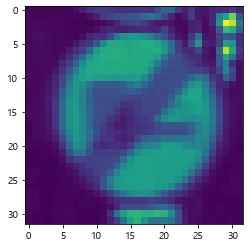

In [9]:
#### 전처리된 이미지 확인

plt.imshow(ds.X[0,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[0,:])

plt.imshow(ds.X[-1,:,:,:].reshape(RESIZED_IMAGE))
print(ds.y[-1,:])


In [55]:
##### 훈련 데이터와 테스트 데이터의 분리

from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(range(ds.X.shape[0]), ds.y, test_size=0.25,
#                                                    random_state=101)
# print(len(X_train), len(X_test))
# type(X_train)
# np.array(X_train).shape

idx_train, idx_test = train_test_split(range(ds.X.shape[0]), test_size=0.25, random_state=101)
print(len(idx_train))
print(idx_train[:10])

X_train = ds.X[idx_train, :, :, :]
print(X_train.shape)

X_test = ds.X[idx_test, :, :, :]
print(X_test.shape)

y_train = ds.y[idx_train, :]
print(y_train.shape)

y_test = ds.y[idx_test, :]
print(y_test.shape)

29406
[271, 23055, 34387, 28229, 26437, 3760, 30266, 11625, 24743, 6505]
(29406, 32, 32, 1)
(9803, 32, 32, 1)
(29406, 43)
(9803, 43)


In [56]:
range(ds.X.shape[0])

range(0, 39209)

### (2) 훈련을 위한 함수 준비

In [57]:
##### 미니 배치 준비

def minibatcher(X, y, batch_size, shuffle):
    assert X.shape[0] == y.shape[0]
    
    n_samples = X.shape[0]
    
    if shuffle:
        idx = np.random.permutation(n_samples)
    else:
        idx = list(range(n_samples))
        
    for i in range(int(np.ceil(n_samples/batch_size))):
        from_idx = i * batch_size
        to_idx = (i+1) * batch_size
        
        yield  X[idx[from_idx:to_idx], :, :, :], y[idx[from_idx:to_idx], :] 

In [58]:
##### 미니 배치 테스트 코드
for i in minibatcher(X_train, y_train, 10000, True):
    print(i[0].shape, i[1].shape)

(10000, 32, 32, 1) (10000, 43)
(10000, 32, 32, 1) (10000, 43)
(9406, 32, 32, 1) (9406, 43)


In [72]:
def fc_no_activation_layer(in_tensors, n_units):
    W = tf.get_variable("fc_W", [in_tensors.get_shape()[1], n_units], 
                       initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("fc_b", [n_units], initializer=tf.constant_initializer(0.0))
    
    return tf.matmul(in_tensors, W) + b

In [73]:
def fc_layer(in_tensors, n_units):
    return tf.nn.leaky_relu(fc_no_activation_layer(in_tensors, n_units))

In [74]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W", [kernel_size, kernel_size, in_tensors.get_shape()[3], n_units], 
                       initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("conv_b", [n_units], initializer=tf.constant_initializer(0.0))
    
    conv = tf.nn.conv2d(in_tensors, W, [1, 1, 1, 1], "SAME")
    
    return tf.nn.leaky_relu(conv + b)

In [76]:
def conv_layer(in_tensors, kernel_size, n_units):
    W = tf.get_variable("conv_W",[kernel_size,kernel_size,in_tensors.get_shape()[3],n_units],
                       initializer=tf.contrib.layers.xavier_initializer())
    
    b = tf.get_variable("conv_b",[n_unit],initializer=tf.constant_initializer(0,0))
    
    conv =tf.nn.conv2d(in_tensors,W,[1,1,1,1],"SAME")
    
    return tf.nn.leaky_relu(conv+b)

In [63]:
def maxpool_layer(in_tensors, sampling):
    return tf.nn.max_pool(in_tensors, [1, sampling, sampling, 1], 
                          [1, sampling, sampling, 1], "SAME")

In [64]:
def dropout(in_tensors, keep_proba, is_training):
    return tf.cond(is_training, lambda:tf.nn.dropout(in_tensors, keep_proba), lambda:in_tensors) #조건문을 써주는 함수

### (3) Model 구현

+ Specification
    - 2차원 Convolution 5* 5, 32 필터
    - 2차원 Convolution 5* 5, 64 필터
    - 평면화 계층 (Flat Layer)
    - Full Connected Layer, 1024개의 unit
    - dropout 40%
    - softmax

In [65]:
def model(in_tensors, is_training):
    # First Layer : 5*5 2d convolution layer, 32 filter, 2x maxpool, 20% dropout
    with tf.variable_scope("L1"):
        l1 = maxpool_layer(conv_layer(in_tensors, 5, 32), 2)
        l1_out = dropout(l1, 0.8, is_training)
        
    # Second Layer : 5*5 2d convolution layer, 64 filter, 2x maxpool, 20% dropout
    with tf.variable_scope("L2"):
        l2 = maxpool_layer(conv_layer(l1_out, 5, 64), 2)
        l2_out = dropout(l2, 0.8, is_training)
        
    # Flat Layer
    with tf.variable_scope("Flatten"):
        l2_out_flat = tf.layers.flatten(l2_out)
        
    # FC Layer, 1024 neurons, 40% dropout
    with tf.variable_scope("L3"):
        l3 = fc_layer(l2_out_flat, 1024)
        l3_out = dropout(l3, 0.6, is_training)
        
    # out
    with tf.variable_scope("out"):
        out_tensors = fc_no_activation_layer(l3_out, N_CLASSES)
        
    return out_tensors
    

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

def train_model(X_train, y_train, lr, max_epochs, batch_size):
    in_X_tensors_batch = tf.placeholder(tf.float32, shape=(None, RESIZED_IMAGE[0], 
                                                           RESIZED_IMAGE[1], 1))
    in_y_tensors_batch = tf.placeholder(tf.float32, shape=(None, N_CLASSES))
    is_training = tf.placeholder(tf.bool)
    
    logit = model(in_X_tensors_batch, is_training)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, 
                                                                    labels=in_y_tensors_batch))
    train = tf.train.AdamOptimizer(learning_rate=lr).minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(max_epochs):
            print("Epoch=", epoch)
            tf_scores = []
            
            for mb in minibatcher(X_train, y_train, batch_size, shuffle=True):
                _, c = sess.run([train, cost], feed_dict={in_X_tensors_batch:mb[0],
                                                         in_y_tensors_batch:mb[1],
                                                         is_training:True})
                tf_scores.append(c)
                
            print("train loss score=", np.mean(tf_scores))
            
        # 훈련이 끝나고 난 후 테스트
        print("TEST SET PERFORMANCE")
        
        out_y_pred = tf.nn.softmax(logit)
        y_test_pred, test_cost = sess.run([out_y_pred, cost], feed_dict={in_X_tensors_batch:X_test,
                                                         in_y_tensors_batch:y_test,
                                                         is_training:False})
        
        print("test_loss_score=", test_cost)
        y_test_pred_classified = np.argmax(y_test_pred, axis=1).astype(np.int32)
        y_test_true_classified = np.argmax(y_test, axis=1).astype(np.int32)
        print(classification_report(y_test_true_classified, y_test_pred_classified))

In [77]:
tf.reset_default_graph()
train_model(X_train, y_train, 0.001, 10, 256)

## 99프로 이상이 나옴

NameError: name 'n_unit' is not defined

In [69]:
"""
1. 일부 CNN 계층과 FC계층을 추가해서 성능이 어떻게 변하는지 확인
2. dropout의 비율을 변경해 보면서 결과가 과소적합 또는 과대적합이 되는지 확인
3. 전체 epoch수와 batch_size도 변경해서 결과 확인
4. 실제 테스트 이미지를 통해 사용 할 수 있는 간단한 프로그램 작성
"""

'\n1. 일부 CNN 계층과 FC계층을 추가해서 성능이 어떻게 변하는지 확인\n2. dropout의 비율을 변경해 보면서 결과가 과소적합 또는 과대적합이 되는지 확인\n3. 전체 epoch수와 batch_size도 변경해서 결과 확인\n4. 실제 테스트 이미지를 통해 사용 할 수 있는 간단한 프로그램 작성\n'